# Pair Programming-ish

In [131]:
# Import relevant libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

**Import pickle file**

In [32]:
cluster_1 = pd.read_pickle('data/cluster1.pkl')

**Take a preview of the data**

In [33]:
cluster_1[:5]

array([[ -9.7356364 ,  -6.75873801,  -9.15647093],
       [ 11.78219511,   1.89352041,  -5.38858894],
       [ -5.53399172,  -0.91530453,  -2.4840391 ],
       [ 13.62804224,   1.93918855,  -6.30123476],
       [ 11.61968942,   1.28493343,  -1.91459859]])

**Standard Scaler**

In [34]:
scaler = StandardScaler()

In [35]:
df = scaler.fit_transform(cluster_1)

**K-Means**

In [80]:
results = []

for i in range(2,20):
    model = KMeans(n_clusters=i, init='k-means++', random_state=1, n_jobs=-1)
    pred = model.fit_predict(df)
    score = silhouette_score(df, pred)
    results.append((i, model, score))

**Show the best five results**

In [98]:
sorted(results,key=lambda x: x[2],reverse=True)[:5]

[(3, KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
      random_state=1, tol=0.0001, verbose=0), 0.61617270967508486),
 (4, KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
      random_state=1, tol=0.0001, verbose=0), 0.51735748877170129),
 (2, KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
      random_state=1, tol=0.0001, verbose=0), 0.48605467074915687),
 (5, KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
      random_state=1, tol=0.0001, verbose=0), 0.42489774264332048),
 (6, KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto'

**Plot the silhouette score vs number of clusters**

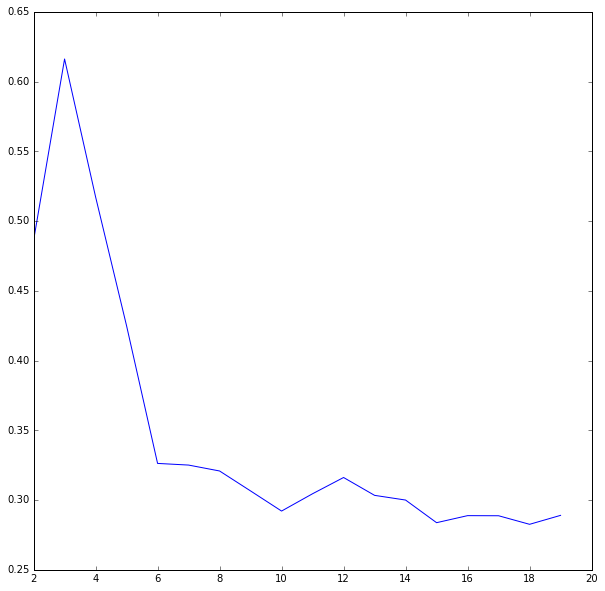

In [97]:
plt.figure(figsize=(10,10))
plt.plot(range(2,20), [result[2] for result in results])

**Plot a 3D plot of the data separated by clusters**

In [118]:
best = sorted(results,key=lambda x: x[2],reverse=True)[0][1]

In [119]:
best_pred = best.fit_predict(df)

In [132]:
best.cluster_centers_

array([[-0.72133963, -1.2538796 , -1.01707902],
       [ 1.38678873,  0.8672118 , -0.0285515 ],
       [-0.66654499,  0.35450021,  1.00518524]])

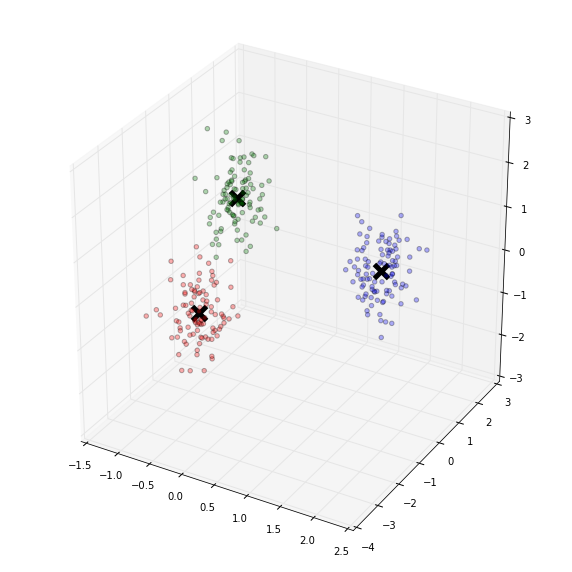

In [151]:
colors = ['r','b','g']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    temp = df[best_pred == i]
    ax.scatter(np.transpose(temp)[0], np.transpose(temp)[1], np.transpose(temp)[2], c=colors[i], alpha=0.3)
    ax.scatter(best.cluster_centers_[i][0],best.cluster_centers_[i][1],best.cluster_centers_[i][2],
               c='black',marker='x',s=200, linewidth=5)